Index(['Age', 'Gender', 'call_time', 'No of notifications', 'No of unlocks',
       'Phone_time', 'Social_media', 'Internet_usage', 'Insomnia',
       'Late_night', 'Loneliness_measure'],
      dtype='object')
Nomophobia
Moderate    264
Severe       81
Mild         74
Absence      11
Name: count, dtype: int64


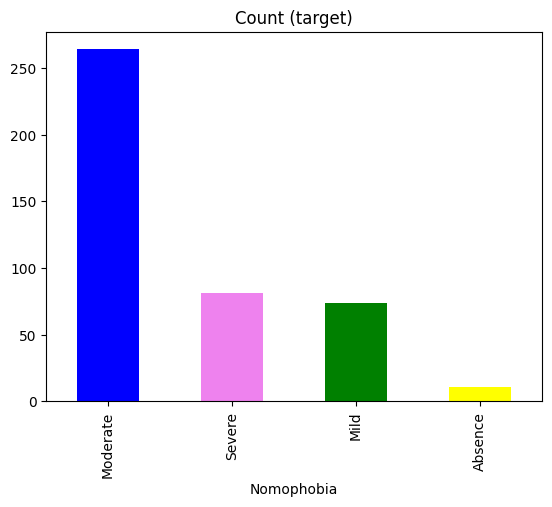

In [1]:
from imblearn.over_sampling import SMOTE,SMOTENC,ADASYN,KMeansSMOTE,SVMSMOTE,BorderlineSMOTE
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "Nomophobia_data.xlsx"
data = pd.read_excel(url)
   

# Checking for missing values
missing_values = data.isnull().sum()

data=data.dropna()
# Splitting the dataset into features and target variable, adjust labels to be zero-indexed
X = data.drop('Nomophobia', axis=1)
print(X.columns)
y = data['Nomophobia']  

y.value_counts()
#plot the data on bar graph to see imbalance
import matplotlib.pyplot as plt

# Get the value counts
value_counts = y.value_counts()
print(value_counts)

# Plot the bar chart with different colors for each class
value_counts.plot(kind='bar', color=['blue', 'violet', 'green', 'yellow'], title='Count (target)')
plt.show()
data['Nomophobia']=data['Nomophobia'].replace({'Mild':0,'Moderate':1,'Severe':2,'Absence':3})
y = data['Nomophobia']


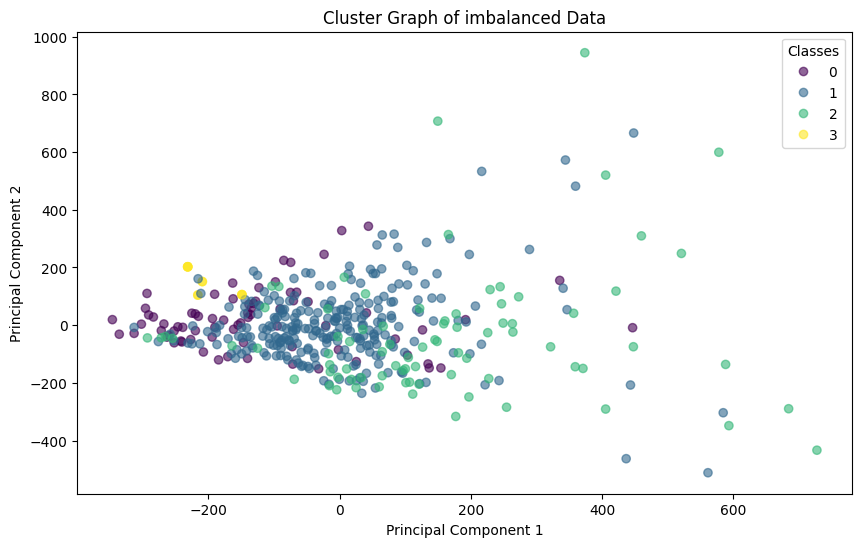

In [2]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the resampled data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title('Cluster Graph of imbalanced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

target
Absence     264
Mild        264
Moderate    264
Severe      264
Name: count, dtype: int64


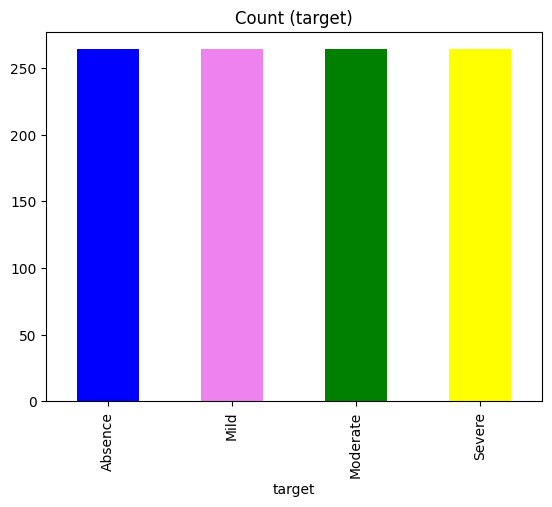

In [3]:
from imblearn.over_sampling import SVMSMOTE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are already defined
smote = SVMSMOTE(sampling_strategy="auto", random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Create a DataFrame from the resampled data
df = pd.DataFrame(X_sm)
df['target'] = y_sm


# Separate the features and target again
X_sm = df.drop('target', axis=1)
y_sm = df['target']

df.to_excel('Balanced_data.xlsx', index=False)

# Define the mapping from numerical values to labels
label_mapping = {0: 'Mild', 1: 'Moderate', 2: 'Severe', 3: 'Absence'}

# Convert the numerical values to labels
y_sm_labels = y_sm.map(label_mapping)

# Get the value counts
value_counts = y_sm_labels.value_counts()
print(value_counts)

# Plot the bar chart with different colors for each class
ax = value_counts.plot(kind='bar', color=['blue', 'violet', 'green', 'yellow'], title='Count (target)')

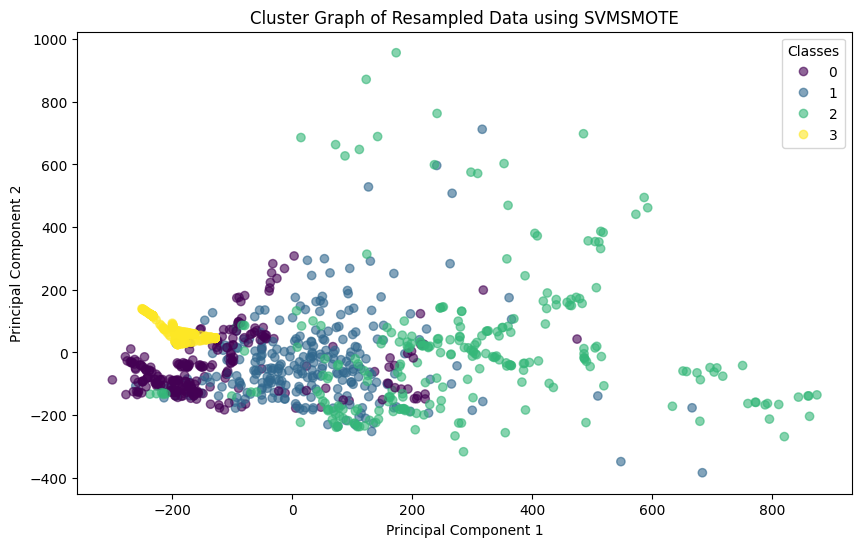

In [4]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sm)

# Plot the resampled data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sm, cmap='viridis', alpha=0.6)
plt.title('Cluster Graph of Resampled Data using SVMSMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

In [5]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is already defined and contains the specified columns
continuous_features = ['Age', 'call_time', 'No of notifications', 'No of unlocks', 'Phone_time', 'Social_media', 'Internet_usage']
target = 'target'


# Define binning intervals
binning_intervals = {
    'Age': 5,
    'call_time': 30,
    'No of notifications': 50,
    'No of unlocks': 50,
    'Phone_time': 30,
    'Social_media': 30,
    'Internet_usage': 30
}
print(df.head())
# Bin the continuous features and create a new DataFrame
binned_df = pd.DataFrame()
for feature, interval in binning_intervals.items():
    max_value = df[feature].max()
    bins = list(range(0, int(max_value) + interval, interval))
    binned_df[feature + '_binned'] = pd.cut(df[feature], bins=bins, include_lowest=True, right=False)

# Add the target column to the new DataFrame
binned_df[target] = df[target]

# Identify non-continuous features
non_continuous_features = [col for col in df.columns if col not in continuous_features + [target]]

# Add non-continuous features to the binned_df
binned_df[non_continuous_features] = df[non_continuous_features]

# Perform chi-square test
features = binned_df.columns.tolist()
features.remove(target)

chi2_results = {}
for feature in features:
    contingency_table = pd.crosstab(binned_df[feature], binned_df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[feature] = (chi2, p)

# Print each column with their chi-square values
print("Chi-Square Test Results:")
for feature, (chi2_value, p_value) in chi2_results.items():
    print(f"{feature}: chi2 = {chi2_value}, p-value = {p_value}")

# Select features with p-value < 0.05
selected_features = [feature for feature, (chi2_value, p_value) in chi2_results.items() if p_value < 0.05]

# Display selected features
print("Selected features based on Chi-Square Test (p-value < 0.05):")
print(selected_features)

# Print the table with feature name, chi-square value, and p-value
print("\nFeature Name\tChi-Square Value\tP-Value")
for feature, (chi2_value, p_value) in chi2_results.items():
    print(f"{feature}\t{chi2_value}\t{p_value}")

   Age  Gender  call_time No of notifications  No of unlocks  Phone_time  \
0   24       1       90.0               258.0             37        47.0   
1   18       1      180.0               206.0             60       146.0   
2   24       1       90.0               258.0             37        47.0   
3   26       0      100.0               221.0             50        75.0   
4   30       0       80.0               176.0             67        89.0   

   Social_media  Internet_usage  Insomnia  Late_night  Loneliness_measure  \
0          12.0            2.13         0           0                   3   
1          30.0          200.00         0           0                   3   
2          12.0            2.13         0           0                   3   
3          45.0           50.00         0           0                   5   
4          60.0           21.00         0           1                   4   

   target  
0       3  
1       3  
2       3  
3       3  
4       3  
Chi-Squa

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X_sm=df.drop('target',axis=1)
y_sm=df['target']

# encode the target variable
label = LabelEncoder()
y_sm = label.fit_transform(y_sm)
#enocode all features excpet Loneliness_measure
X_sm = X_sm.apply(label.fit_transform)


X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42,stratify=y_sm)

missing_values, X_train.shape, X_test.shape
X_sm.head()

,Age,Gender,call_time,No of notifications,No of unlocks,Phone_time,Social_media,Internet_usage,Insomnia,Late_night,Loneliness_measure
0,8,1,350,546,44,31,46,63,0,0,3
1,2,1,489,388,67,271,72,706,0,0,3
2,8,1,350,546,44,31,46,63,0,0,3
3,10,0,368,470,57,82,161,344,0,0,5
4,14,0,288,306,74,154,260,173,0,1,4


In [7]:
from sklearn.impute import SimpleImputer

# Impute missing values using the median strategy (appropriate for numerical data)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Converting imputed data back to DataFrame for easier handling
X_train = pd.DataFrame(X_train_imputed, columns=X.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X.columns)

# Verify that no missing values remain
X_train.isnull().sum(), X_test.isnull().sum()

(Age                    0
 Gender                 0
 call_time              0
 No of notifications    0
 No of unlocks          0
 Phone_time             0
 Social_media           0
 Internet_usage         0
 Insomnia               0
 Late_night             0
 Loneliness_measure     0
 dtype: int64,
 Age                    0
 Gender                 0
 call_time              0
 No of notifications    0
 No of unlocks          0
 Phone_time             0
 Social_media           0
 Internet_usage         0
 Insomnia               0
 Late_night             0
 Loneliness_measure     0
 dtype: int64)

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# Standardize the data (TabTransformer benefits from standardized inputs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define TabTransformer model structure
class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, num_heads=4, hidden_dim=128, num_layers=4, 
                 dropout_rate=0.0001, lr=0.001, weight_decay=1e-4):
        super(TabTransformer, self).__init__()
        
        # Model layers
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self.layers = nn.ModuleList([
            nn.Sequential(
                nn.MultiheadAttention(hidden_dim, num_heads, batch_first=True),
                nn.LayerNorm(hidden_dim),
                nn.Linear(hidden_dim, hidden_dim),
                nn.ReLU(),
                nn.LayerNorm(hidden_dim)
            ) for _ in range(num_layers)
        ])
        self.fc = nn.Linear(hidden_dim, num_classes)
        
        # Optimizer and Scheduler within the class
        self.optimizer = torch.optim.Adam(self.parameters(), lr=lr, weight_decay=weight_decay)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.7)

    def forward(self, x):
        x = self.dropout(self.input_layer(x))
        x = x.unsqueeze(1)
        
        for layer in self.layers:
            attn_output, _ = layer[0](x, x, x)
            x = x + attn_output
            x = layer[1](x)
            ff_output = layer[2](x)
            x = x + F.relu(ff_output)
            x = layer[4](x)
            
        x = x.squeeze(1)
        x = self.fc(x)
        return x

    def step_optimizer(self):
        """Perform a single optimization step and update learning rate."""
        self.optimizer.step()
        self.scheduler.step()

    def zero_grad(self):
        """Zero the gradients before backpropagation."""
        self.optimizer.zero_grad()
        
# Initialize model parameters
input_dim = X_train.shape[1]
num_classes = 4
model = TabTransformer(input_dim=input_dim, num_classes=num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            _, predicted = torch.max(outputs.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
    
    accuracy = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}")

# Final evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(batch_y.numpy())

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

Epoch [1/50], Loss: 0.8403, Test Accuracy: 0.7818
Epoch [2/50], Loss: 1.1736, Test Accuracy: 0.7873
Epoch [3/50], Loss: 0.4419, Test Accuracy: 0.8370
Epoch [4/50], Loss: 0.5969, Test Accuracy: 0.8315
Epoch [5/50], Loss: 0.2940, Test Accuracy: 0.8204
Epoch [6/50], Loss: 0.6579, Test Accuracy: 0.8674
Epoch [7/50], Loss: 0.3999, Test Accuracy: 0.8508
Epoch [8/50], Loss: 0.3148, Test Accuracy: 0.8840
Epoch [9/50], Loss: 0.2137, Test Accuracy: 0.8812
Epoch [10/50], Loss: 0.1191, Test Accuracy: 0.8564
Epoch [11/50], Loss: 0.3684, Test Accuracy: 0.8591
Epoch [12/50], Loss: 0.4772, Test Accuracy: 0.9061
Epoch [13/50], Loss: 0.0314, Test Accuracy: 0.8923
Epoch [14/50], Loss: 0.1077, Test Accuracy: 0.8702
Epoch [15/50], Loss: 0.2115, Test Accuracy: 0.9171
Epoch [16/50], Loss: 0.0652, Test Accuracy: 0.9199
Epoch [17/50], Loss: 0.0458, Test Accuracy: 0.9033
Epoch [18/50], Loss: 0.1961, Test Accuracy: 0.8867
Epoch [19/50], Loss: 0.2174, Test Accuracy: 0.8867
Epoch [20/50], Loss: 0.5770, Test Accura

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Define hyperparameters
config = {
    'learning_rate': 0.001,
    'weight_decay': 0.0001,
    'dropout_rate': 0.2,
    'batch_size': 8,
    'num_epochs': 50,
    'num_transformer_blocks': 4,
    'num_attention_heads': 4,
    'hidden_dim': 128,
    'embedding_dim': 16,
    'mlp_hidden_units_factor': 2,
    'num_mlp_blocks': 3
}

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False)

# Define TabTransformer model structure
class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, config):
        super(TabTransformer, self).__init__()
        self.input_layer = nn.Linear(input_dim, config['hidden_dim'])
        self.layers = nn.ModuleList([
            nn.Sequential(
                nn.MultiheadAttention(config['hidden_dim'], config['num_attention_heads'], batch_first=True),
                nn.LayerNorm(config['hidden_dim']),
                nn.Linear(config['hidden_dim'], config['hidden_dim']),
                nn.ReLU(),
                nn.LayerNorm(config['hidden_dim'])
            ) for _ in range(config['num_transformer_blocks'])
        ])
        self.fc = nn.Linear(config['hidden_dim'], num_classes)

    def forward(self, x):
        x = self.input_layer(x)
        x = x.unsqueeze(1)  # Add sequence dimension
        for layer in self.layers:
            attn_output, _ = layer[0](x, x, x)
            x = x + attn_output
            x = layer[1](x)
            ff_output = layer[2](x)
            x = x + F.relu(ff_output)
            x = layer[4](x)
        x = x.squeeze(1)  # Remove sequence dimension
        x = self.fc(x)
        return x

# Example usage
input_dim = X_train_tensor.shape[1]
num_classes = len(torch.unique(y_train_tensor))
model = TabTransformer(input_dim, num_classes, config)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'], weight_decay=config['weight_decay'])
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(config['num_epochs']):
    model.train()
    for batch in train_loader:
        inputs, targets = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    
    # Validation loop (optional)
    model.eval()
    with torch.no_grad():
        for batch in test_loader:
            inputs, targets = batch
            outputs = model(inputs)
            val_loss = criterion(outputs, targets)
            # Compute validation metrics (accuracy, etc.)

    print(f'Epoch {epoch+1}/{config["num_epochs"]}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')
# Final evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(batch_y.numpy())

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
    

Epoch 1/50, Loss: 0.7834165692329407, Val Loss: 0.3964172601699829
Epoch 2/50, Loss: 0.533734142780304, Val Loss: 0.8503602743148804
Epoch 3/50, Loss: 0.5347733497619629, Val Loss: 0.7181492447853088
Epoch 4/50, Loss: 0.5551197528839111, Val Loss: 0.6360151767730713
Epoch 5/50, Loss: 0.9304819703102112, Val Loss: 0.4039735198020935
Epoch 6/50, Loss: 0.2472444325685501, Val Loss: 0.7266607284545898
Epoch 7/50, Loss: 0.9510679244995117, Val Loss: 0.5090100169181824
Epoch 8/50, Loss: 0.4334697723388672, Val Loss: 0.6461758017539978
Epoch 9/50, Loss: 0.3524761497974396, Val Loss: 0.572104275226593
Epoch 10/50, Loss: 0.2796897888183594, Val Loss: 0.23665373027324677
Epoch 11/50, Loss: 0.7210226655006409, Val Loss: 0.3084743618965149
Epoch 12/50, Loss: 0.10373701900243759, Val Loss: 0.595482587814331
Epoch 13/50, Loss: 0.269369900226593, Val Loss: 0.5798521637916565
Epoch 14/50, Loss: 0.7832043170928955, Val Loss: 0.5809025168418884
Epoch 15/50, Loss: 0.72654128074646, Val Loss: 0.3883146047

In [18]:
# Step 1: Install pytorch-tabnet
# !pip install pytorch-tabnet

import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 2: Define TabNet model
tabnet_model = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    cat_idxs=[], cat_dims=[], cat_emb_dim=1,
    lambda_sparse=1e-3, optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax', scheduler_params=None,
    scheduler_fn=None, epsilon=1e-15
)

# Step 3: Train the model
tabnet_model.fit(
    X_train=X_train_scaled, y_train=y_train,
    eval_set=[(X_test_scaled, y_test)],
    eval_name=['test'], eval_metric=['accuracy'],
    max_epochs=100, patience=10, batch_size=256, virtual_batch_size=128,
    num_workers=0, drop_last=False
)

# Step 4: Evaluate the model
y_pred = tabnet_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

C:\Users\mesri\AppData\Roaming\Python\Python311\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.8084  | test_accuracy: 0.42818 |  0:00:00s
epoch 1  | loss: 1.0729  | test_accuracy: 0.4116  |  0:00:01s
epoch 2  | loss: 0.86772 | test_accuracy: 0.59945 |  0:00:01s
epoch 3  | loss: 0.7556  | test_accuracy: 0.64088 |  0:00:02s
epoch 4  | loss: 0.69445 | test_accuracy: 0.67956 |  0:00:03s
epoch 5  | loss: 0.65838 | test_accuracy: 0.69061 |  0:00:03s
epoch 6  | loss: 0.5768  | test_accuracy: 0.71547 |  0:00:04s
epoch 7  | loss: 0.5469  | test_accuracy: 0.71547 |  0:00:04s
epoch 8  | loss: 0.55785 | test_accuracy: 0.75138 |  0:00:05s
epoch 9  | loss: 0.55017 | test_accuracy: 0.75138 |  0:00:05s
epoch 10 | loss: 0.54924 | test_accuracy: 0.78453 |  0:00:06s
epoch 11 | loss: 0.53022 | test_accuracy: 0.83149 |  0:00:06s
epoch 12 | loss: 0.54605 | test_accuracy: 0.79282 |  0:00:07s
epoch 13 | loss: 0.62091 | test_accuracy: 0.73204 |  0:00:07s
epoch 14 | loss: 0.57365 | test_accuracy: 0.77624 |  0:00:08s
epoch 15 | loss: 0.5576  | test_accuracy: 0.76796 |  0:00:08s
epoch 16

C:\Users\mesri\AppData\Roaming\Python\Python311\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix




# Train a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# Train a Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Decision Tree Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        91
           1       0.78      0.78      0.78        96
           2       0.80      0.88      0.84        88
           3       1.00      1.00      1.00        87

    accuracy                           0.88       362
   macro avg       0.88      0.88      0.88       362
weighted avg       0.88      0.88      0.88       362

[[78 11  2  0]
 [ 4 75 17  0]
 [ 1 10 77  0]
 [ 0  0  0 87]]
Random Forest Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        91
           1       0.92      0.90      0.91        96
           2       0.91      0.97      0.94        88
           3       1.00      1.00      1.00        87

    accuracy                           0.95       362
   macro avg       0.95      0.95      0.95       362
weighted avg       0.95      0.95      0.95       362

[[86  4  1 

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing

# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,y_train)

preds = gbc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, preds))
print(confusion_matrix(y_test,preds))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        91
           1       0.87      0.75      0.80        96
           2       0.86      0.95      0.90        88
           3       1.00      1.00      1.00        87

    accuracy                           0.90       362
   macro avg       0.90      0.90      0.90       362
weighted avg       0.90      0.90      0.90       362

[[83  7  1  0]
 [11 72 13  0]
 [ 0  4 84  0]
 [ 0  0  0 87]]


In [8]:
#APPLY SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the SVM model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        53
           1       0.68      0.75      0.71        53
           2       0.84      0.79      0.82        53
           3       1.00      1.00      1.00        53

    accuracy                           0.83       212
   macro avg       0.84      0.83      0.84       212
weighted avg       0.84      0.83      0.84       212



In [10]:
#ensemble classifier of RT,GB,SVM AND DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Define the individual models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gbc = GradientBoostingClassifier()
svm = SVC()

# Create a list of the models
models = [
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('gbc', gbc),
    ('svm', svm)
]

# Define the ensemble model
ensemble = VotingClassifier(models, voting='hard')
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Accuracy: {accuracy_ensemble:.2f}')
print(classification_report(y_test, y_pred_ensemble))
print(confusion_matrix(y_test, y_pred_ensemble))



Ensemble Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        53
           1       0.81      0.83      0.82        53
           2       0.92      0.85      0.88        53
           3       1.00      1.00      1.00        53

    accuracy                           0.90       212
   macro avg       0.90      0.90      0.90       212
weighted avg       0.90      0.90      0.90       212

[[49  2  2  0]
 [ 7 44  2  0]
 [ 0  8 45  0]
 [ 0  0  0 53]]
